### LAB 13/11/2019<br>
TOPIC: VISUAL DATA PROFILING<br>
This tutorial lab contains 4 QUESTIONS - try to answer all of them.


---


Write your detail:<br>
NAME: MUHAMMAD AJRUL AMIN BIN MOHD ZAIDI<br>
MATRIC NO: A194789

### 1. Descriptive Statistics

In [27]:
#import libraries
import pandas as pd

In [28]:
#read data
beers = pd.read_csv("https://raw.githubusercontent.com/nickhould/craft-beers-dataset/master/data/processed/beers.csv")
breweries = pd.read_csv("https://raw.githubusercontent.com/nickhould/craft-beers-dataset/master/data/processed/breweries.csv")

In [29]:
#merge the two data
beers_and_breweries = pd.merge(beers,
                               breweries,
                               how='inner',
                               left_on="brewery_id",
                               right_on="id",
                               sort=True,
                               suffixes=('_beer', '_brewery'))

## **QUESTION-1**: Try to answers the questions below :<br>
1. how the data 'beers'and 'breweries' are merged?<br>
ANSWER:<br> Data 'beers' and 'breweries' are merged using inner join.
2. what is the name of the new dataframe?<br>
ANSWER:<br> beers_and_breweries
3. what will be the code do display the new/merge data?<br>
ANSWER:<br> print(beers_and_breweries)


In [30]:
#question-1: your code start here
print(beers_and_breweries.head())

   Unnamed: 0_beer    abv   ibu  id_beer      name_beer               style  \
0             1493  0.045  50.0     2692   Get Together        American IPA   
1             1494  0.049  26.0     2691  Maggie's Leap  Milk / Sweet Stout   
2             1495  0.048  19.0     2690     Wall's End   English Brown Ale   
3             1496  0.060  38.0     2689        Pumpion         Pumpkin Ale   
4             1497  0.060  25.0     2688     Stronghold     American Porter   

   brewery_id  ounces  Unnamed: 0_brewery        name_brewery         city  \
0           0    16.0                   0  NorthGate Brewing   Minneapolis   
1           0    16.0                   0  NorthGate Brewing   Minneapolis   
2           0    16.0                   0  NorthGate Brewing   Minneapolis   
3           0    16.0                   0  NorthGate Brewing   Minneapolis   
4           0    16.0                   0  NorthGate Brewing   Minneapolis   

  state  id_brewery  
0    MN           0  
1    MN     

In [31]:
#total of observations/rows of column 'ibu'.
length = len(beers["ibu"])
print(length)

2410


In [32]:
#return the number of non-NA/non-null observations in column 'ibu'.
count = beers["ibu"].count()
print(count)

1405


In [33]:
# calculate the number of missing values
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

41.7%


In [34]:
#minimum and maximum value of a dataset. min/max values are helpful to understand the range of values in a variable.
print("Minimum value: ", beers["ibu"].min())
print("Maximum value: ", beers["ibu"].max())

Minimum value:  4.0
Maximum value:  138.0


## **QUESTION-2**:<br>
Can you think of one use of max and min in analyzing your dataset?<br>
ANSWER:<br> To identify the strongest and the least bitter beer.

In [35]:
#mode is the most frequent value in a dataset. In a normal distribution, the mode is equal to the mean and median.
print(beers["ibu"].mode())

0    20.0
Name: ibu, dtype: float64


In [36]:
#the sum of the values divided by the count of non-missing observations.
#It is influenced by outliers. A few extreme values can greatly change the mean, dragging it up or down.
mean = beers["ibu"].mean()
print(mean)

42.71316725978647


In [37]:
#the number exactly in the middle of an ordered list of numerical values.
#In the case of skewed distributions, the median is a much better measure of central tendency than the mean
median = beers["ibu"].median()
print(median)

35.0


In [38]:
#a measure of dispersion.
#A high standard deviation indicates the data points are spread over a wide range of values
standarddev = beers["ibu"].std()
print(standarddev)

25.954065911259324


In [39]:
#cut points that split a distribution in equal sizes
quantile = beers["ibu"].quantile([.25, .5, .75])
print(quantile)

0.25    21.0
0.50    35.0
0.75    64.0
Name: ibu, dtype: float64


In [40]:
#discover relationships between numerical variables.
#correlation coefficient ranges from -1 to 1.
# a correlation of 1 is a total positive correlation
# a correlation of -1 is a total negative correlation
# a correlation of 0 is non-linear
beers[["abv", "ibu", "ounces"]].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


## **QUESTION-3**: Based on the correlation value above, which two attributes are closely related?<br>
ANSWER: <br>Two attributes are closely related are abv and ibu. Their correlation value is 0.6706, which indicates a moderate positive relationship.

### 2. Data visualization profiling<br>
In this tutorial, we will look at Kaggle matlibplot tutorial:<br>
https://www.kaggle.com/baburam1985/matplotlib-tutorial

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [42]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [43]:
#read csv file into dataframe
athlete_eventsDF = pd.read_csv('sukan.csv')

In [44]:
athlete_eventsDF.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [45]:
finDF = athlete_eventsDF[athlete_eventsDF.Team == 'Finland']
finWinningDF = finDF[~pd.isna(finDF.Medal) ]
allWiningDF = athlete_eventsDF[~pd.isna(athlete_eventsDF.Medal)]

In [46]:
finWinningDF.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
37,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [47]:
allWiningDF.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [48]:
yearwiseData = (finDF['Year']).value_counts()
yearwiseWinningData = (finWinningDF['Year']).value_counts()
yearallWiningDFdata = (allWiningDF['Year']).value_counts()

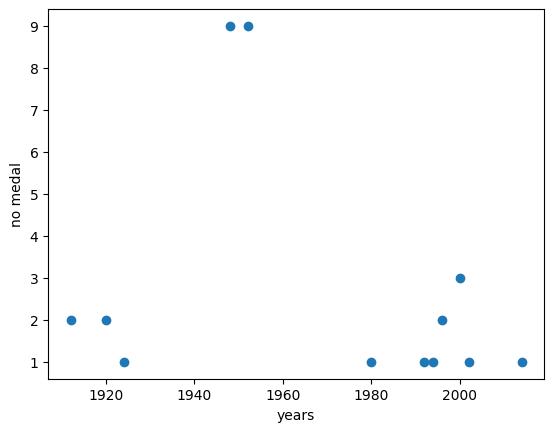

In [49]:
plt.figure()
plt.scatter(yearwiseData.index,yearwiseData.values)
plt.xlabel('years')
plt.ylabel('no medal')
plt.show()

<BarContainer object of 4 artists>

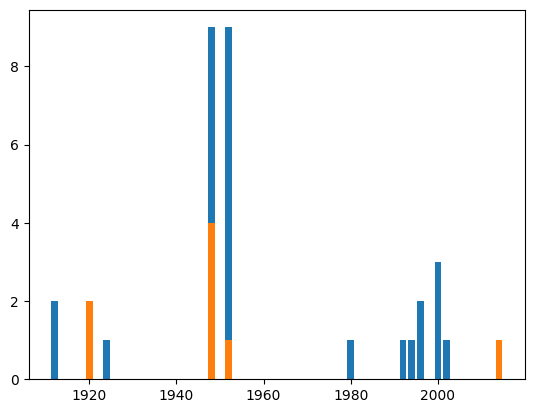

In [50]:
#FIGURE-1
plt.bar(yearwiseData.index,yearwiseData.values, width = 1.5)
plt.bar(yearwiseWinningData.index,yearwiseWinningData.values, width = 1.5 )

## **QUESTIONS-3**:<br>
Looking at the histogram figure above. What is the stacked histogram is describing?<br>
ANSWER:<br> The blue bars reflect overall occurrences per year.
The orange bars indicate the subset for example 'winning' of those occurrences.

<BarContainer object of 12 artists>

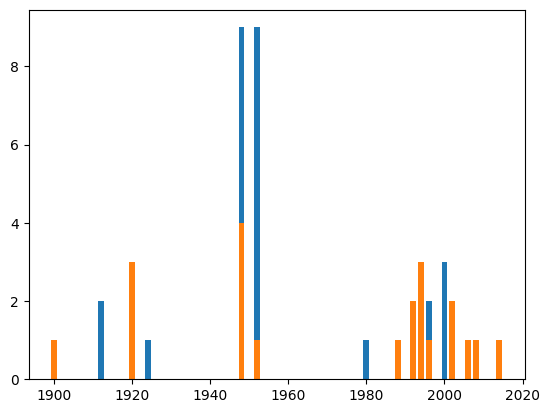

In [51]:
#FIGURE-2
plt.bar(yearwiseData.index,yearwiseData.values, width = 1.5)
plt.bar(yearallWiningDFdata.index,yearallWiningDFdata.values, width = 1.5 )

## **QUESTIONS-4**:<br>
Looking at the histogram figure above. What is the stacked histogram is describing?<br>
ANSWER:<br> The blue bars represent one dataset (yearwiseData), showing the frequency of occurrences per year.
The orange bars represent another dataset (yearallWiningDFdata) with similar values but plotted separately.